# Fuzzy C-Means (FCM):

**Что такое Fuzzy C-Means (FCM)?**

Fuzzy C-Means (размытый K-средних) - это алгоритм кластеризации, который расширяет идеи классического K-средних, позволяя каждой точке данных принадлежать не только к одному кластеру, а иметь "размытую" принадлежность к нескольким кластерам.

**Алгоритм работы:**

1. **Инициализация:**
   - Начинаем с случайной инициализации центров кластеров и матрицы принадлежности (U).
   - Матрица U содержит вероятности принадлежности каждой точки к каждому кластеру.

2. **E-шаг (Expectation):**
   - Вычисляем новые значения матрицы U на основе текущих центров кластеров.
   - Используется функция принадлежности, которая может быть выражена через экспоненту отношения расстояний между точкой и центром кластера.

3. **M-шаг (Maximization):**
   - Обновляем центры кластеров, используя новые значения матрицы U.
   - Это подобно обновлению центров в K-средних, но с учетом "размытости" принадлежности.

4. **Повторение E и M шагов:**
   - Повторяем E и M шаги до тех пор, пока матрица принадлежности не стабилизируется или достигнет предельного числа итераций.

**Параметры:**
- **Параметр "m":** Определяет степень размытости (обычно выбирается от 1 до бесконечности).
- **Число кластеров:** Как и в K-средних, число кластеров нужно определить заранее.

**Преимущества FCM:**
- Позволяет учитывать неопределенность в принадлежности точек к кластерам.
- Гибче в сравнении с K-средними при моделировании различных структур в данных.

**Недостатки FCM:**
- Требует тщательного подбора параметров, таких как число кластеров и параметр "m".
- Вычислительно более затратен по сравнению с K-средними.

Fuzzy C-Means - это отличный выбор для задач, где данные могут иметь нечеткую принадлежность к разным кластерам.

In [1]:
!pip install fuzzy_c_means

     ---------------------------------------- 2.1/2.1 MB 89.2 kB/s eta 0:00:00
  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff

from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [4]:
data = pd.read_csv('Datasets/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.shape

(167, 10)

In [6]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
columns = data.columns
columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['country'])
le.transform(data['country'])
data['country'] = le.transform(data['country'])

In [11]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


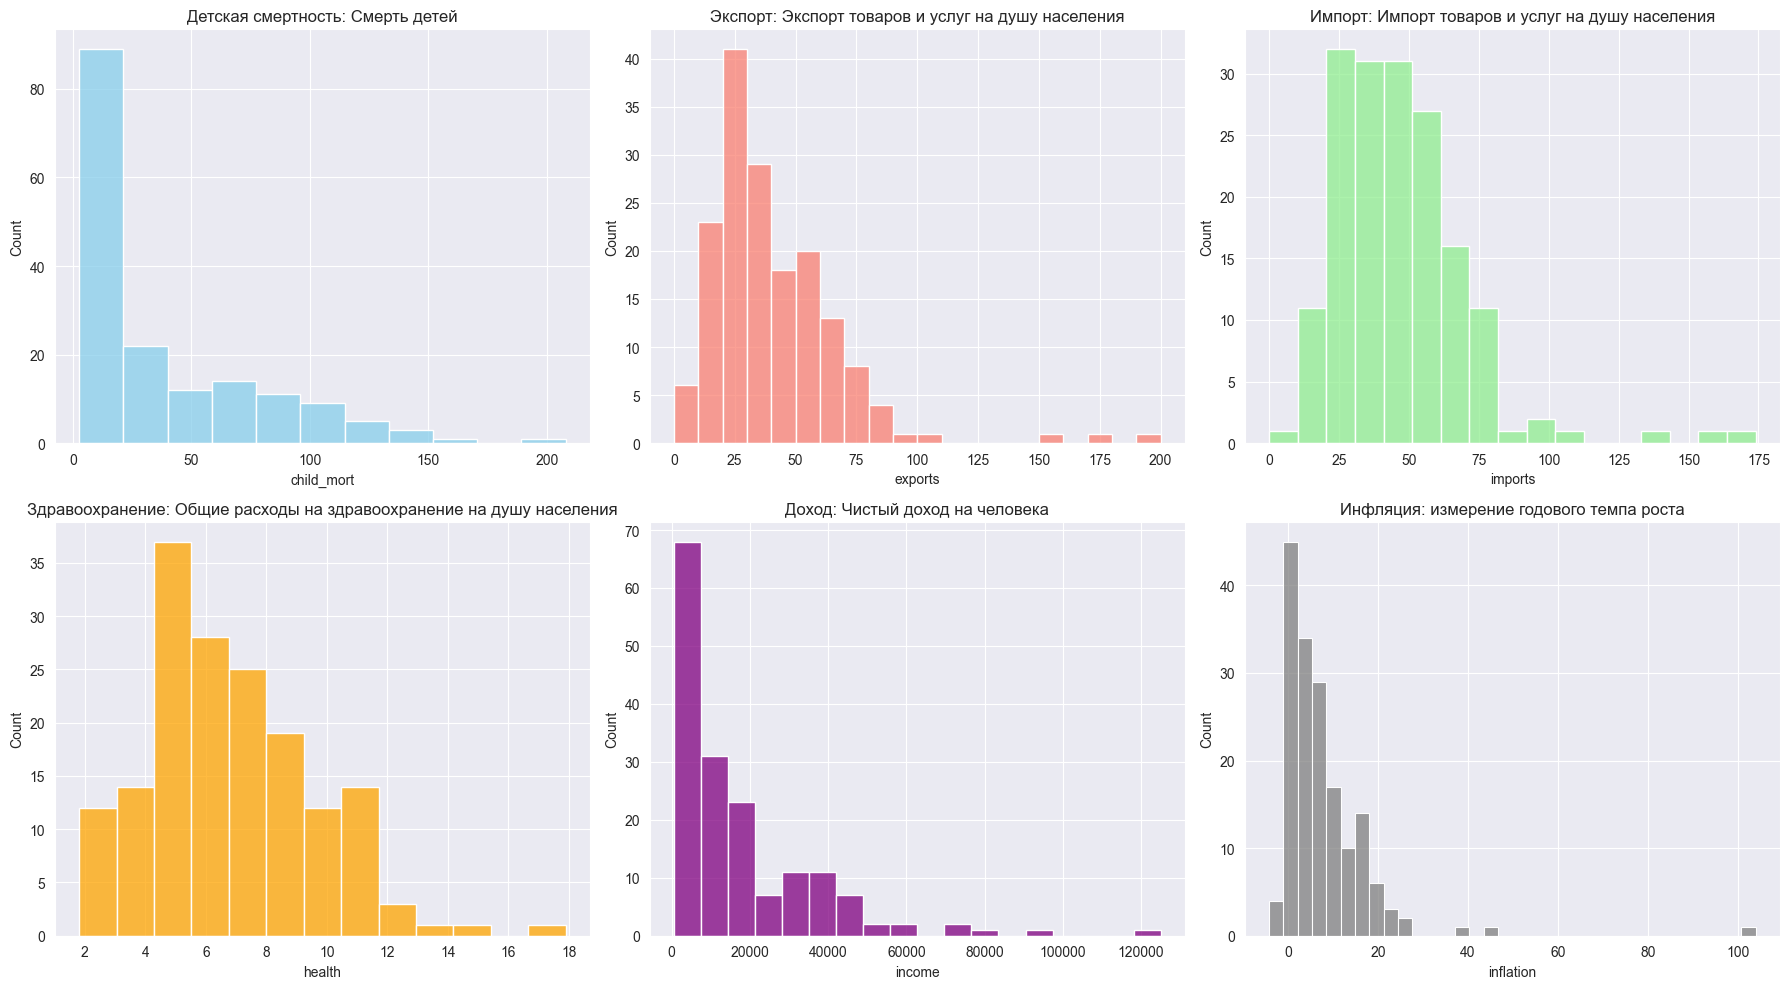

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

sns.histplot(data["child_mort"], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Детская смертность: Смерть детей")

sns.histplot(data["exports"], ax=axes[0, 1], color='salmon')
axes[0, 1].set_title("Экспорт: Экспорт товаров и услуг на душу населения")

sns.histplot(data["imports"], ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title("Импорт: Импорт товаров и услуг на душу населения")

sns.histplot(data["health"], ax=axes[1, 0], color='orange')
axes[1, 0].set_title("Здравоохранение: Общие расходы на здравоохранение на душу населения")

sns.histplot(data["income"], ax=axes[1, 1], color='purple')
axes[1, 1].set_title("Доход: Чистый доход на человека")

sns.histplot(data["inflation"], ax=axes[1, 2], color='gray')
axes[1, 2].set_title("Инфляция: измерение годового темпа роста")

plt.tight_layout()
plt.show()

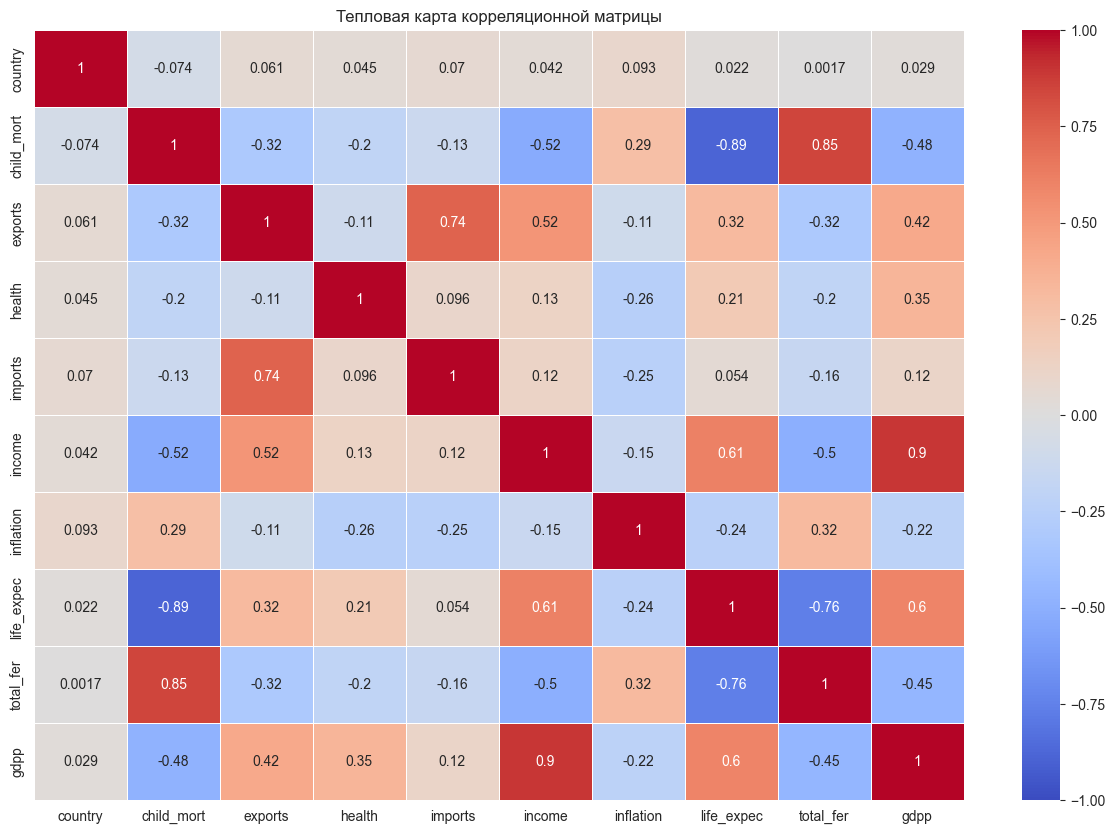

In [14]:
plt.figure(figsize=(15, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title("Тепловая карта корреляционной матрицы")
plt.show()


In [15]:
scalarModel = StandardScaler()
data = scalarModel.fit_transform(data)
data

array([[-1.72171011,  1.29153238, -1.13827979, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-1.70096662, -0.5389489 , -0.47965843, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-1.68022312, -0.27283273, -0.09912164, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [ 1.68022312, -0.37231541,  1.13030491, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 1.70096662,  0.44841668, -0.40647827, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.72171011,  1.11495062, -0.15034774, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [16]:
fcmModel = FCM(n_clusters=4)
fcmModel.fit(data)
center = fcmModel.centers
center

array([[-0.09137745, -0.70946361,  0.14911384,  0.83374671, -0.15176105,
         0.9695212 , -0.4055164 ,  0.92300924, -0.66662818,  1.24419925],
       [ 0.01447524, -0.24688331,  0.04854796, -0.16283511,  0.07182705,
        -0.11422937, -0.00221098,  0.14507229, -0.26108649, -0.20385162],
       [ 0.03626397, -0.26454723,  0.07493346, -0.14898386,  0.09892441,
        -0.10046156, -0.01787084,  0.1605165 , -0.28013922, -0.1928856 ],
       [-0.10237571,  1.25692715, -0.43068725, -0.30442181, -0.21128575,
        -0.65950076,  0.17923716, -1.14358026,  1.30703663, -0.56899498]])

In [17]:
pred = fcmModel.predict(data)
print('Прогнозируемое значение для модели fcm равно: ', pred)
pred.shape

Прогнозируемое значение для модели fcm равно:  [3 1 1 3 2 1 1 0 0 1 0 0 1 2 1 0 1 3 1 1 2 1 1 0 2 3 3 1 3 0 1 3 3 1 1 1 3
 3 3 0 3 2 0 0 0 1 1 1 1 3 3 2 1 0 0 3 3 2 0 3 0 1 1 3 3 2 3 2 0 1 1 1 1 0
 0 0 1 0 2 1 3 3 0 2 3 2 2 3 3 2 2 0 2 3 3 2 2 3 0 3 2 2 2 1 2 1 3 3 3 1 0
 0 3 3 0 2 3 2 2 1 1 2 0 0 2 1 3 1 2 3 2 2 3 0 0 0 2 3 0 0 1 2 3 2 0 0 1 3
 2 3 3 1 2 2 2 3 2 0 0 0 2 1 2 1 2 3 3]


(167,)

In [18]:
data = pd.DataFrame(data, columns=columns)
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,1.638736,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,1.659480,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,1.680223,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,1.700967,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [19]:
data['cluster'] = pred
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,3
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,3
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,2


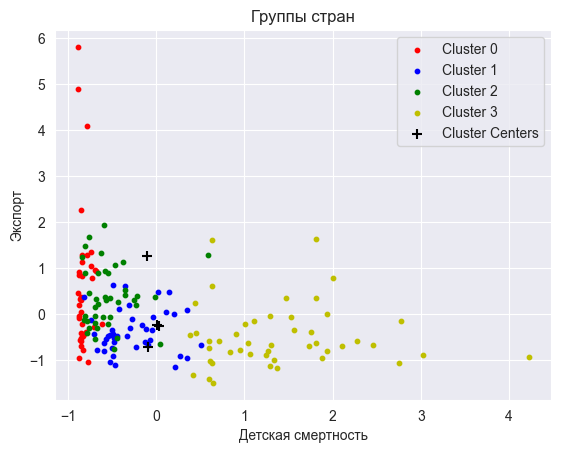

In [21]:
plt.scatter(data.loc[data['cluster'] == 0, 'child_mort'], data.loc[data['cluster'] == 0, 'exports'], s=10, c='r',
            label='Cluster 0')
plt.scatter(data.loc[data['cluster'] == 1, 'child_mort'], data.loc[data['cluster'] == 1, 'exports'], s=10, c='b',
            label='Cluster 1')
plt.scatter(data.loc[data['cluster'] == 2, 'child_mort'], data.loc[data['cluster'] == 2, 'exports'], s=10, c='g',
            label='Cluster 2')
plt.scatter(data.loc[data['cluster'] == 3, 'child_mort'], data.loc[data['cluster'] == 3, 'exports'], s=10, c='y',
            label='Cluster 3')

# Plotting cluster centers
plt.scatter(center[:, 0], center[:, 1], s=50, c='black', marker='+', label='Cluster Centers')

plt.title('Группы стран')
plt.xlabel('Детская смертность')
plt.ylabel('Экспорт')
plt.legend()
plt.show()